In [2]:
from os.path import join as pjoin
from nilearn.image import load_img, new_img_like, math_img
from nilearn import plotting
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cmasher as cmr

In [3]:
max_rois = pd.read_csv('/home/joyneelm/emoprox2_slds_bootstrap_resamples/README_MAX_ROIs_final_gm_85.txt',sep='\t')
# print(max_rois.ROI.values)
roi_list = ['ant. ventral Insula','ant. dorsal Insula','mid/post Insula','BST','vmPFC1','vmPFC2','PAG']
max_rois = max_rois[max_rois.ROI.isin(roi_list)]
display(max_rois)

,Hemi,ROI,Index,Voxels,File_Name
4,M,vmPFC1,5,67,vmPFC.nii.gz
5,M,vmPFC2,6,81,Hartley_vmPFC_5mm.nii.gz
47,R,ant. ventral Insula,48,176,Hammers-gm-0.5-anterior_pole_INS-r_2mm.nii.gz
48,L,ant. ventral Insula,49,171,Hammers-gm-0.5-anterior_pole_INS-1_2mm.nii.gz
49,R,ant. dorsal Insula,50,235,Hammers-gm-0.5-2mm-AntDorsal-INS-r.nii.gz
50,L,ant. dorsal Insula,51,236,Hammers-gm-0.5-2mm-AntDorsal-INS-l.nii.gz
51,R,mid/post Insula,52,572,Hammers-gm-0.5-2mm-MidPosterior-INS-r.nii.gz
52,L,mid/post Insula,53,533,Hammers-gm-0.5-2mm-MidPosterior-INS-l.nii.gz
53,R,BST,54,8,rBNST.nii.gz
54,L,BST,55,9,lBNST.nii.gz


In [4]:
atlas = load_img('/home/joyneelm/templates/MAX_ROIs_final_gm_85.nii.gz')

atlas_data = atlas.get_fdata()

vmPFC_data = (atlas_data==6).astype('int')#+(atlas_data==6).astype('int')
vmPFC = new_img_like(data=vmPFC_data,ref_niimg=atlas)
antINS_data = (atlas_data==50).astype('int')*1#+(atlas_data==51).astype('int')
antINS = new_img_like(data=antINS_data,ref_niimg=atlas)


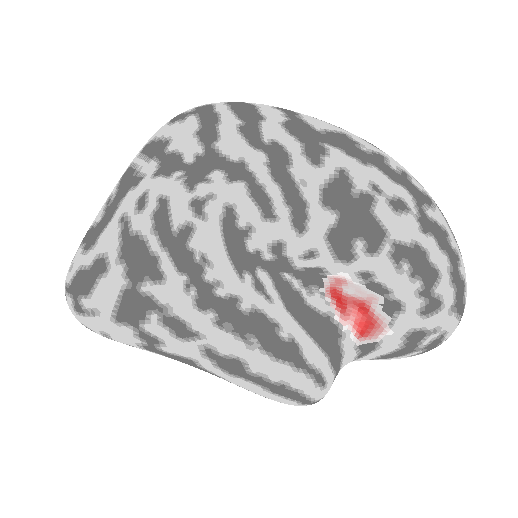

In [5]:
fig,ax = plotting.plot_img_on_surf(
        antINS,
        surf_mesh='fsaverage5',
        mask_img=None,
        hemispheres=['right'],
        bg_on_data=True,
        inflate=True,
        views=['lateral'],
        output_file=None,
        title='',
        colorbar=False,
        # vmax=1,
        threshold=0.001,
        symmetric_cbar=True,
        cmap='bwr',#cmr.guppy_r,
        colorbar_fontsize=100
    )
fig.set_size_inches(10.5, 10.5)
fig.savefig(f'figures/fig_antINS.png',dpi=600,bbox_inches='tight',transparent=True)


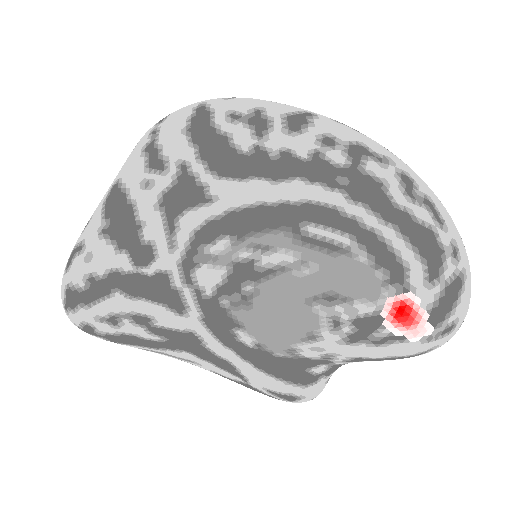

In [6]:
fig,ax = plotting.plot_img_on_surf(
        vmPFC,
        surf_mesh='fsaverage5',
        mask_img=None,
        hemispheres=['left'],
        bg_on_data=False,
        inflate=True,
        views=['medial'],
        output_file=None,
        title='',
        colorbar=False,
        # vmax=1,
        threshold=0.001,
        symmetric_cbar=True,
        cmap='bwr',#cmr.guppy_r,
        colorbar_fontsize=100
    )
fig.set_size_inches(10.5, 10.5)
fig.savefig(f'figures/fig_vmPFC.png',dpi=600,bbox_inches='tight',transparent=True)


In [9]:
# ROI names and network labels for Schaefer 100 ROI atlas
atlas_df = pd.read_csv('https://raw.githubusercontent.com/ThomasYeoLab/CBIG/master/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/MNI/freeview_lut/Schaefer2018_100Parcels_17Networks_order.txt',sep='\t',header=None)
atlas_df = atlas_df[[0,1]]
atlas_df.columns = ['idx','name']
atlas_df['name'] = atlas_df['name'].apply(lambda s: s[11:].split('_'))
atlas_df['hemi'] = atlas_df['name'].apply(lambda s: s[0])
atlas_df['network'] = atlas_df['name'].apply(lambda s: s[1])
atlas_df['name'] = atlas_df['name'].apply(lambda s: '_'.join(s[2:]))
atlas_df['idx'] = atlas_df['idx'] - 1
display(atlas_df.network.unique())

array(['VisCent', 'VisPeri', 'SomMotA', 'SomMotB', 'DorsAttnA',
       'DorsAttnB', 'SalVentAttnA', 'SalVentAttnB', 'LimbicB', 'LimbicA',
       'ContA', 'ContB', 'ContC', 'DefaultA', 'DefaultB', 'DefaultC',
       'TempPar'], dtype=object)

In [22]:
atlas = load_img('/home/joyneelm/templates/Schaefer2018_100Parcels_17Networks_order_FSLMNI152_2mm.nii.gz')

atlas_data = atlas.get_fdata()

default_data = np.zeros_like(atlas_data)
for idx_roi,row in atlas_df.iterrows():
    if 'Default' in row.network: 
        default_data += (atlas_data==row.idx+1).astype('int')
default = new_img_like(data=default_data, ref_niimg=atlas)

salience_data = np.zeros_like(atlas_data)
for idx_roi,row in atlas_df.iterrows():
    if 'Sal' in row.network: 
        salience_data += (atlas_data==row.idx+1).astype('int')
salience = new_img_like(data=salience_data, ref_niimg=atlas)

blank_data = np.zeros_like(atlas_data)
blank = new_img_like(data=blank_data, ref_niimg=atlas)


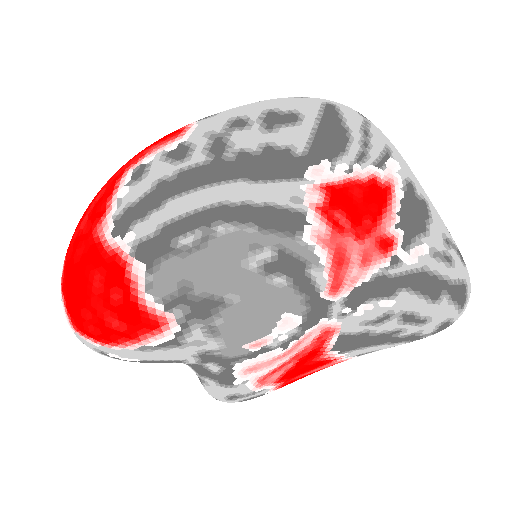

In [21]:
fig,ax = plotting.plot_img_on_surf(
        default,
        surf_mesh='fsaverage5',
        mask_img=None,
        hemispheres=['right'],
        bg_on_data=False,
        inflate=True,
        views=['medial'],
        output_file=None,
        title='',
        colorbar=False,
        # vmax=1,
        threshold=0.001,
        symmetric_cbar=True,
        cmap='bwr',#cmr.guppy_r,
        colorbar_fontsize=100
    )
fig.set_size_inches(10.5, 10.5)
fig.savefig(f'figures/fig_default_network.png',dpi=600,bbox_inches='tight',transparent=True)


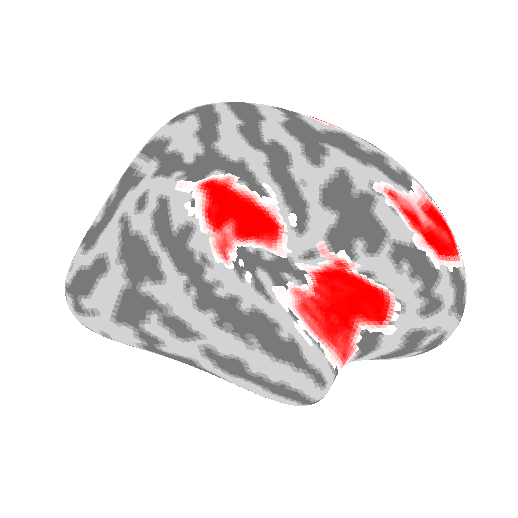

In [20]:
fig,ax = plotting.plot_img_on_surf(
        salience,
        surf_mesh='fsaverage5',
        mask_img=None,
        hemispheres=['right'],
        bg_on_data=False,
        inflate=True,
        views=['lateral'],
        output_file=None,
        title='',
        colorbar=False,
        # vmax=1,
        threshold=0.001,
        symmetric_cbar=True,
        cmap='bwr',#cmr.guppy_r,
        colorbar_fontsize=100
    )
fig.set_size_inches(10.5, 10.5)
fig.savefig(f'figures/fig_salience_network.png',dpi=600,bbox_inches='tight',transparent=True)


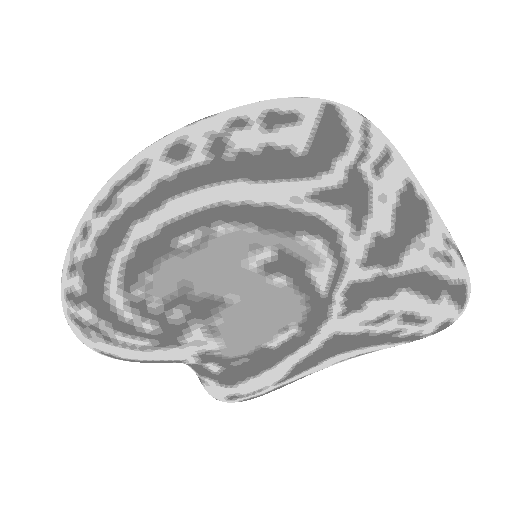

In [35]:
fig,ax = plotting.plot_img_on_surf(
        blank,
        # surf_mesh='fsaverage5',
        mask_img=None,
        hemispheres=['right'],
        bg_on_data=False,
        inflate=True,
        views=['medial'],
        output_file=None,
        title='',
        colorbar=False,
        # vmax=1,
        threshold=0.001,
        symmetric_cbar=True,
        cmap='bwr',#cmr.guppy_r,
        colorbar_fontsize=100
    )
fig.set_size_inches(10.5, 10.5)
fig.savefig(f'figures/fig_blank_brain.png',dpi=600,bbox_inches='tight',transparent=True)


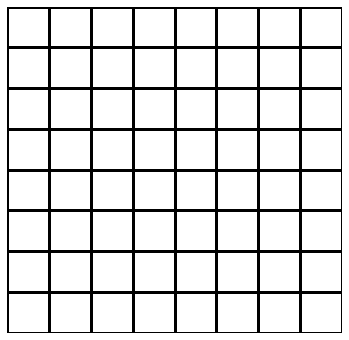

In [38]:
import matplotlib.pyplot as plt

def draw_empty_grid(rows=10, cols=10, line_width=2):
    fig, ax = plt.subplots(figsize=(6,6))

    # Draw grid lines with increased thickness
    for x in range(cols + 1):
        ax.plot([x, x], [0, rows], 'k-', lw=line_width)
    for y in range(rows + 1):
        ax.plot([0, cols], [y, y], 'k-', lw=line_width)

    # Remove ticks, labels, and spines
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    plt.xlim(0, cols)
    plt.ylim(0, rows)
    plt.gca().invert_yaxis()  # Match the top-left origin of the original image

    plt.show()
    fig.savefig(f'figures/empty_grid.png',dpi=600,bbox_inches='tight',transparent=True)


draw_empty_grid(8, 8, line_width=3)


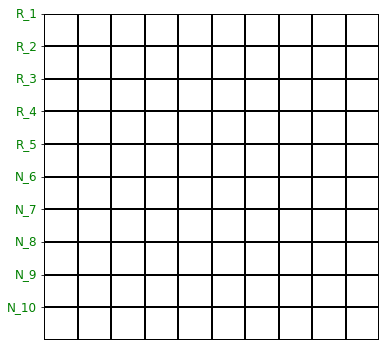